In [3]:
import dbnomics
import janitor

In [27]:
inflation_raw = dbnomics.fetch_series(provider_code="ONS",dataset_code="MM23",series_code="L55O.M")
inflation_raw.pipe(janitor.clean_names).head(1)

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,title,freq,title,frequency
0,monthly,ONS,MM23,Consumer price inflation time series,L55O.M,CPIH ANNUAL RATE 00: ALL ITEMS 2015=100 – Monthly,1947-06,1947-06-01,NA,NaN,L55O,M,CPIH ANNUAL RATE 00: ALL ITEMS 2015=100,Monthly


In [28]:
inflation=  inflation_raw.set_index('period')

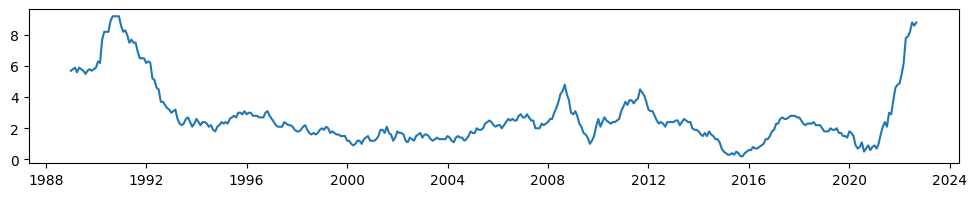

In [29]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(inflation.value)
fig.set_size_inches(12,2)

In [22]:
import pandas as pd
base_rate = pd.read_csv("../../resources/Bank Rate history and data  Bank of England Database.csv")
base_rate = base_rate.pipe(janitor.clean_names)
base_rate['date_changed']= pd.to_datetime(base_rate.date_changed)
# print(base_rate.info())
print(base_rate.describe())
base_rate=base_rate.set_index('date_changed')
base_rate.head()

             rate
count  246.000000
mean     9.155407
std      3.739537
min      0.100000
25%      6.160000
50%      9.880000
75%     11.880000
max     17.000000


Timestamp('1975-01-20 00:00:00')

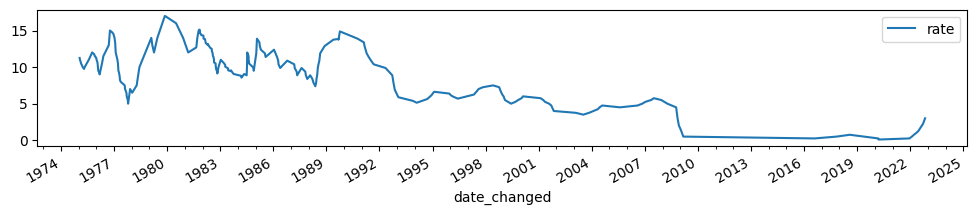

In [59]:
import matplotlib.dates as mdate
base_rate.plot(figsize = (12,2))
plt.gca().xaxis.set_minor_locator(mdate.MonthLocator(1))
plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdate.YearLocator(3))